In [ ]:
#Eda Nur Demir 28916
import networkx as nx
from networkx.generators.random_graphs import erdos_renyi_graph
import matplotlib.pyplot as plt
from networkx.algorithms.approximation import clique_removal
import numpy as np
import time
import math

def check_connected(G):
  if nx.is_connected(G):
    return False
  else:
    return True

def create_graph(V,p):
  myflag = True
  while myflag:
    G = erdos_renyi_graph(V, p)
    if G.number_of_nodes() != 0:
      myflag = check_connected(G)
    else:
      myflag = False
  edges = list(G.edges)
  return G, V, edges

def draw_graph(G):
  nx.draw(G, with_labels=True, font_weight='bold')

vertice_num = 5
G,v, edges = create_graph(vertice_num, 1)
draw_graph(G)
print("Edges are following:",edges)

def organize_graph(edges):

  if len(edges) != 0:
    G_org = dict([])
    for i in range(len(edges)):
        v1, v2 = edges[i]
        if(v1 not in G_org):
            G_org[v1] = []
        if(v2 not in G_org):
            G_org[v2] = []
        G_org[v1].append(v2)
        G_org[v2].append(v1)
  else:
    G_org = dict({0: []})
  return G_org

G_org = organize_graph(edges)
print("Our graph where dictionary keys correspond to vertices and values correspond to edge from this key")
G_org

def find_max_set(G):
  vertices = list(G.keys())
  if len(vertices) == 0:
    return [], 0
  elif len(vertices) == 1:
    return [vertices[0]], 1
  else:
    temp = vertices[0]
    G2 = dict(G)
    del G2[temp]
    set1 = find_max_set(G2)[0]
    for vertice in G[temp]:
      if(vertice in G2):
          del G2[vertice]
    set2 = [temp] + find_max_set(G2)[0]
    if len(set2) > len(set1):
      return set2, len(set2)
    else:
      return set1, len(set1)

max_set, cardinality = find_max_set(G_org)
print("Maximum Independent Set: ", set(max_set))
print("Corresponding Cardinality of the Maximum Independent Set: ", cardinality)

#Approximated Maximum Independent Set
def approximation_max_set(G):
  max_set, _ = clique_removal(G)
  return max_set

approximated_max_set = approximation_max_set(G)
print("Approximated Maximum Independent Set: ", set(approximated_max_set))
print("Corresponding Cardinality of the Maximum Independent Set: ", len(approximated_max_set))

class vertice:
  def __init__(self, id, next_vertices, independent):
    self.id = id
    self.next_vertices = next_vertices
    self.independent = independent

def reorganize_graph(G):
  edges = list(G.edges)
  nodes = vertice_num
  random_vertices = []
  random_edges = []

  for elm in edges:
    elm1 = elm[0]
    elm2 = elm[1]
    random_edges.append([elm1,elm2])

  for i in range(nodes): # Generating vertices
        vex = vertice(i,[],0)
        random_vertices.append(vex)

  for i in range(len(random_edges)): # Adding neighbouts to points
    id_1 = random_edges[i][0]
    id_2 = random_edges[i][1]

    for j in range(len(random_vertices)):
      if random_vertices[j].id == id_1 and id_2 not in random_vertices[j].next_vertices:
        random_vertices[j].next_vertices.append(id_2)
      if random_vertices[j].id == id_2 and id_1 not in random_vertices[j].next_vertices:
        random_vertices[j].next_vertices.append(id_1)
  path = []
  #print(check_path_func(random_vertices, 0 , path))
  #for i in range(len(random_vertices)):
    #print(random_vertices[i].id, random_vertices[i].next_vertices , random_vertices[i].independent)
  graph = random_vertices
  return graph
#graph = reorganize_graph(G)

import random
def check_path_func(random_vertices,start_idx,path):
  path.append(start_idx)
  for idx in range(len(random_vertices[start_idx].next_vertices)):
    if random_vertices[start_idx].next_vertices[idx] not in path:
      #path.append(random_vertices[start_idx].next_vertices[idx])

      check_path_func(random_vertices,random_vertices[start_idx].next_vertices[idx],path)
  if len(path) == len(random_vertices):
    return True
  else:
    return False

def find_min_element(graph): # Finding the point whhich has smallest number of connected neighbours to start the program - O(N)
  if len(graph) != 0:
    min_next_number = len(graph[0].next_vertices)
    min_id = graph[0].id
    for i in range(1,len(graph)):
      if len(graph[i].next_vertices) < min_next_number and len(graph[i].next_vertices) >0:
        min_next_number = len(graph[i].next_vertices)
        min_id = graph[i].id
    return min_id
  else:
    return -99

def next_vertice_sort(graph): # For every element in graph, sort the nighbours of the element - O(N*N*N) = O(N^3)
  for id in range(len(graph)): # O(N)
    for vertice_id_prev in range(len(graph[id].next_vertices)): #O(N)
      vertice_id = graph[id].next_vertices[vertice_id_prev]
      min_elm = len(graph[vertice_id].next_vertices)
      min_elm_id = vertice_id_prev
      for vertice_id_check_prev in range(vertice_id_prev,len(graph[id].next_vertices)): #O(N)
        vertice_id_check = graph[id].next_vertices[vertice_id_check_prev]
        if min_elm > len(graph[vertice_id_check].next_vertices):
          min_elm = len(graph[vertice_id_check].next_vertices)
          min_elm_id = vertice_id_check_prev
      #swap min with selected element
      tmp_id = graph[id].next_vertices[vertice_id_prev]
      graph[id].next_vertices[vertice_id_prev] = graph[id].next_vertices[min_elm_id]
      graph[id].next_vertices[min_elm_id] = tmp_id
  return graph

def find_max_independent(graph,id,count,counter):
  if id != -99:
    check = True
    #Check for whether the point has independent nighbour or not
    for ix in range(len(graph[id].next_vertices)): # O(N) for checking every edges of a vertice
      if(graph[graph[id].next_vertices[ix]].independent == 1):
        count = count + 1
        check = False
        break;
    if check:
      graph[id].independent = 1
    else:
      graph[id].independent = -1
    #If point has marked as 1: mark it's neighbours as -1, dont mark anything otherwise
    for i in range(len(graph[id].next_vertices)): # O(N) for iterating thorough every edges of a vertice
      count = count + 1
      if graph[graph[id].next_vertices[i]].independent == 0 and graph[id].independent == 1:
        graph[graph[id].next_vertices[i]].independent = -1
      for idx in range(len(graph[graph[id].next_vertices[i]].next_vertices)): # O(N) for iterating through every edges of the next independent points
        #Call recursive Function for each nighbour of neighbour of the point
        if graph[graph[graph[id].next_vertices[i]].next_vertices[idx]].independent == 0:
          graph = find_max_independent(graph,graph[graph[graph[id].next_vertices[i]].next_vertices[idx]].id,count,counter) # O(N^2) recursion
        else:
          continue
    return graph
  else:
    return []

def max_cardinality(graph):
  max_cardinality = []
  for elm in graph:
    if elm.independent == 1: # If the id has marked "independent", add to max_cardinality
      max_cardinality.append(elm)
  return max_cardinality

##Sample generation for testing
vertice_num = 10
G,v, edges = create_graph(vertice_num, 0.5)
draw_graph(G)
graph = reorganize_graph(G)
min_id= find_min_element(graph)
graph = next_vertice_sort(graph)
graph_edited = find_max_independent(graph,min_id,0,0)
for i in range(len(graph_edited)):
  print(graph[i].id, graph[i].next_vertices, graph[i].independent)
max_cardinality_2 = max_cardinality(graph_edited)
print("Max Cardinality is: ", len(max_cardinality_2))

Edges are following: [(0, 1), (0, 2), (0, 3), (0, 4), (1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4)]
Our graph where dictionary keys correspond to vertices and values correspond to edge from this key
Maximum Independent Set:  {4}
Corresponding Cardinality of the Maximum Independent Set:  1
Approximated Maximum Independent Set:  {4}
Corresponding Cardinality of the Maximum Independent Set:  1
0 [5, 3] 1
1 [8, 4, 5, 2, 9, 3, 6] -1
2 [7, 4, 5, 9, 1, 6] 1
3 [0, 7, 4, 5, 9, 1, 6] -1
4 [2, 5, 9, 1, 3, 6] -1
5 [0, 2, 4, 3, 1, 6] -1
6 [8, 7, 4, 5, 2, 9, 1, 3] -1
7 [8, 2, 9, 3, 6] -1
8 [7, 1, 6] 1
9 [7, 2, 4, 3, 1, 6] -1
Max Cardinality is:  3
╒═════════════════╤═════════════════╤═════════════════╤═════════════╤══════════════════════╤══════════════════════╤══════════════════════╤══════════════════════╕
│   Vertex Number │   Mean Time (s) │   Std Deviation │   Std Error │   CL 90% Lower Bound │   CL 90% Upper Bound │   CL 95% Lower Bound │   CL 95% Upper Bound │
╞═════════════════╪═════════════

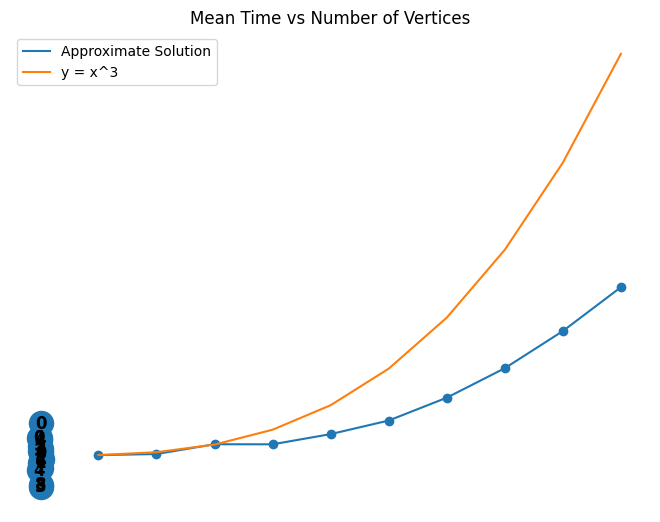

╒═════════════════╤═════════════════╤═════════════════╤═════════════╤══════════════════════╤══════════════════════╤══════════════════════╤══════════════════════╕
│   Vertex Number │   Mean Time (s) │   Std Deviation │   Std Error │   CL 90% Lower Bound │   CL 90% Upper Bound │   CL 95% Lower Bound │   CL 95% Upper Bound │
╞═════════════════╪═════════════════╪═════════════════╪═════════════╪══════════════════════╪══════════════════════╪══════════════════════╪══════════════════════╡
│             0.1 │       0.0227637 │      0.00157667 │ 0.000352555 │            0.0221542 │            0.0233733 │            0.0220258 │            0.0235016 │
├─────────────────┼─────────────────┼─────────────────┼─────────────┼──────────────────────┼──────────────────────┼──────────────────────┼──────────────────────┤
│             0.2 │       0.0795798 │      0.00268206 │ 0.000599726 │            0.0785428 │            0.0806167 │            0.0783245 │            0.080835  │
├─────────────────┼─────────

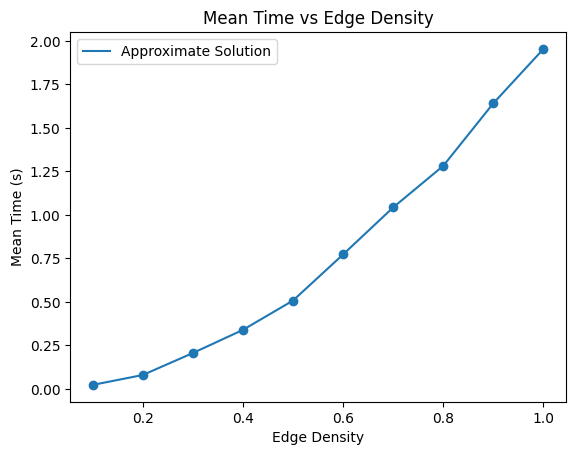

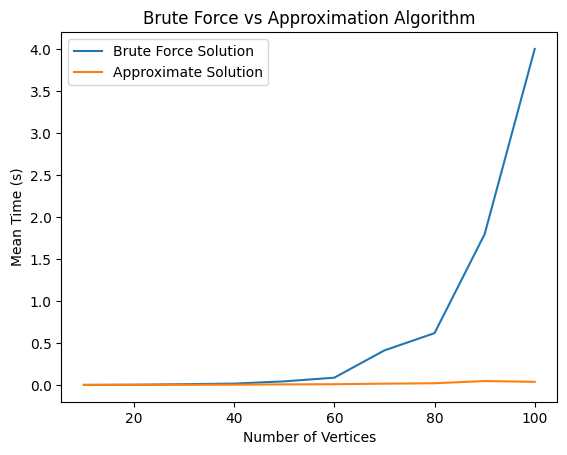

╒═══════════════════════╤═══════════╤═══════════════════════════════════╤═══════════════════════════════════╕
│   Number of Vertices  │   Quality │   Min Difference of Cardinalities │   Max Difference of Cardinalities │
╞═══════════════════════╪═══════════╪═══════════════════════════════════╪═══════════════════════════════════╡
│                     5 │  1        │                                 0 │                                 0 │
├───────────────────────┼───────────┼───────────────────────────────────┼───────────────────────────────────┤
│                     6 │  0.998    │                                 0 │                                 1 │
├───────────────────────┼───────────┼───────────────────────────────────┼───────────────────────────────────┤
│                     7 │  0.995667 │                                 0 │                                 1 │
├───────────────────────┼───────────┼───────────────────────────────────┼───────────────────────────────────┤
│         

{0: [1, 2, 4, 5, 7, 8, 9, 11, 14, 15, 16, 18, 19, 21, 23],
 1: [0, 3, 6, 9, 14, 15, 16, 17, 20, 23],
 2: [0, 3, 6, 7, 8, 9, 11, 12, 15, 17, 21, 22, 23],
 4: [0, 6, 7, 12, 13, 15, 17, 18, 21, 22, 23, 24],
 5: [0, 3, 7, 10, 14, 15, 17, 18, 20, 22, 23],
 7: [0, 2, 3, 4, 5, 8, 16, 18, 20],
 8: [0, 2, 3, 6, 7, 10, 11, 12, 14, 16, 20, 21, 22, 24],
 9: [0, 1, 2, 3, 10, 12, 13, 15, 18, 19, 20, 21, 23],
 11: [0, 2, 8, 10, 13, 15, 16, 20, 23],
 14: [0, 1, 3, 5, 6, 8, 10, 17, 18, 20, 22, 23, 24],
 15: [0, 1, 2, 3, 4, 5, 6, 9, 11, 12, 17, 18, 20, 24],
 16: [0, 1, 7, 8, 10, 11, 13, 17, 18, 21, 23],
 18: [0, 4, 5, 6, 7, 9, 10, 14, 15, 16, 17, 22, 24],
 19: [0, 3, 6, 9, 12, 13, 20, 21],
 21: [0, 2, 3, 4, 6, 8, 9, 13, 16, 19, 20, 22, 24],
 23: [0, 1, 2, 3, 4, 5, 6, 9, 11, 12, 14, 16, 17],
 3: [1, 2, 5, 6, 7, 8, 9, 12, 14, 15, 17, 19, 20, 21, 23, 24],
 6: [1, 2, 3, 4, 8, 10, 12, 14, 15, 18, 19, 21, 23, 24],
 17: [1, 2, 3, 4, 5, 10, 13, 14, 15, 16, 18, 22, 23],
 20: [1, 3, 5, 7, 8, 9, 10, 11, 14, 15, 19

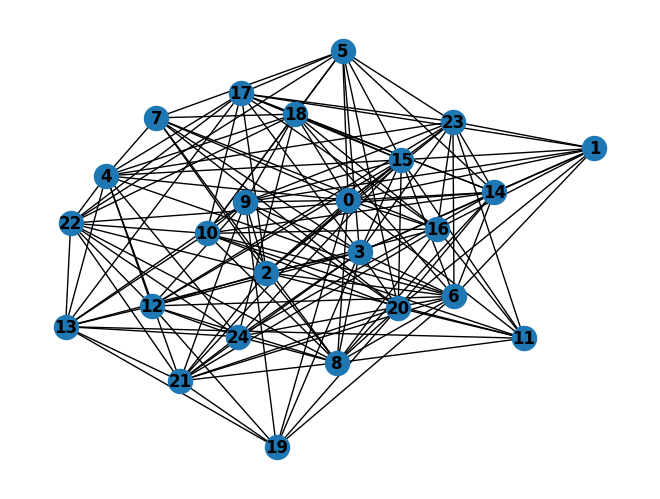

In [1]:
"""#**Performance Testing**"""

N = 20
mean_times = []
standard_deviations = []
standard_errors = []
confidence_lower_90 = []
confidence_upper_90 = []
confidence_lower_95 = []
confidence_upper_95 = []
t1 = 1.729
t2 = 2.093
vertice_numbers = range(50,501,50)

for i in vertice_numbers:
  vertice_num = i
  time_arr = []
  for _ in range(N):
    G,v, edges = create_graph(vertice_num, 0.4)
    graph = reorganize_graph(G)
    start = time.time()
    min_id= find_min_element(graph)
    graph = next_vertice_sort(graph)
    graph_edited = find_max_independent(graph,min_id,0,0)
    max_cardinality_2 = max_cardinality(graph_edited)
    end = time.time()
    time_arr.append(end - start)
  m = np.array(time_arr).mean()
  sd = np.array(time_arr).std()
  sm = np.array(time_arr).std() / math.sqrt(N)
  con_low_90 = m - t1*sm
  con_up_90 = m + t1*sm
  con_low_95 = m - t2*sm
  con_up_95 = m + t2*sm
  mean_times.append(m)
  standard_deviations.append(sd)
  standard_errors.append(sm)
  confidence_lower_90.append(con_low_90)
  confidence_lower_95.append(con_low_95)
  confidence_upper_90.append(con_up_90)
  confidence_upper_95.append(con_up_95)

#!pip install tabulate

from tabulate import tabulate
print(tabulate({"Vertex Number": list(vertice_numbers), "Mean Time (s)": mean_times, "Std Deviation":standard_deviations, "Std Error":standard_errors, "CL 90% Lower Bound":confidence_lower_90, "CL 90% Upper Bound":confidence_upper_90,"CL 95% Lower Bound":confidence_lower_95,"CL 95% Upper Bound":confidence_upper_95}, headers=["Vertex Number", "Mean Time (s)", "Std Deviation", "Std Error", "CL 90% Lower Bound", "CL 90% Upper Bound","CL 95% Lower Bound", "CL 95% Upper Bound"], tablefmt='fancy_grid'))

x = np.array(list(vertice_numbers))
y = mean_times
y2 = x**3
plt.plot(x, y, label = 'Approximate Solution')
plt.scatter(x,y)
plt.plot(x, y2/10**7, label = 'y = x^3')
plt.xlabel("Number of Vertices")
plt.ylabel("Mean Time (s)")
plt.legend()
plt.title("Mean Time vs Number of Vertices")
plt.show()

N = 20
mean_times = []
standard_deviations = []
standard_errors = []
confidence_lower_90 = []
confidence_upper_90 = []
confidence_lower_95 = []
confidence_upper_95 = []
t1 = 1.729
t2 = 2.093
density = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
vertice_num = 200
for i in density:
  p = i
  time_arr = []
  for _ in range(N):
    G,v, edges = create_graph(vertice_num, p)
    graph = reorganize_graph(G)
    start = time.time()
    min_id= find_min_element(graph)
    graph = next_vertice_sort(graph)
    graph_edited = find_max_independent(graph,min_id,0,0)
    max_cardinality_2 = max_cardinality(graph_edited)
    end = time.time()
    time_arr.append(end - start)
  m = np.array(time_arr).mean()
  sd = np.array(time_arr).std()
  sm = np.array(time_arr).std() / math.sqrt(N)
  con_low_90 = m - t1*sm
  con_up_90 = m + t1*sm
  con_low_95 = m - t2*sm
  con_up_95 = m + t2*sm
  mean_times.append(m)
  standard_deviations.append(sd)
  standard_errors.append(sm)
  confidence_lower_90.append(con_low_90)
  confidence_lower_95.append(con_low_95)
  confidence_upper_90.append(con_up_90)
  confidence_upper_95.append(con_up_95)

from tabulate import tabulate
print(tabulate({"Edge Density": density, "Mean Time (s)": mean_times, "Std Deviation":standard_deviations, "Std Error":standard_errors, "CL 90% Lower Bound":confidence_lower_90, "CL 90% Upper Bound":confidence_upper_90,"CL 95% Lower Bound":confidence_lower_95,"CL 95% Upper Bound":confidence_upper_95}, headers=["Vertex Number", "Mean Time (s)", "Std Deviation", "Std Error", "CL 90% Lower Bound", "CL 90% Upper Bound","CL 95% Lower Bound", "CL 95% Upper Bound"], tablefmt='fancy_grid'))

x = density
y = mean_times
plt.plot(x, y, label = 'Approximate Solution')
plt.scatter(x,y)
plt.xlabel("Edge Density")
plt.ylabel("Mean Time (s)")
plt.legend()
plt.title("Mean Time vs Edge Density")
plt.show()

import time
time_brute_arr = []
for i in range(10,101,10):
  vertice_num = i
  G,v, edges = create_graph(vertice_num, 0.4)
  G_org = organize_graph(edges)
  start = time.time()
  max_set, cardinality = find_max_set(G_org)
  end = time.time()
  time_brute_arr.append(end - start)

time_arr_app = []
vertice_numbers = range(10,101,10)

for i in vertice_numbers:
  vertice_num = i
  G,v, edges = create_graph(vertice_num, 0.4)
  graph = reorganize_graph(G)
  start = time.time()
  min_id= find_min_element(graph)
  graph = next_vertice_sort(graph)
  graph_edited = find_max_independent(graph,min_id,0,0)
  max_cardinality_2 = max_cardinality(graph_edited)
  end = time.time()
  time_arr_app.append(end - start)

x = np.array(range(10,101,10))
y1 = time_brute_arr
y2 = time_arr_app
plt.plot(x, y1, label = 'Brute Force Solution')
plt.plot(x, y2, label = 'Approximate Solution')
plt.xlabel("Number of Vertices")
plt.ylabel("Mean Time (s)")
plt.title("Brute Force vs Approximation Algorithm")
plt.legend()
plt.show()

vertice_numbers = [5, 6, 7, 8, 9, 10]
N = 1000
quality = []
difference_card1 = []
difference_card2 = []
for i in vertice_numbers:
  vertice_num = i
  cardinality_app = []
  cardinality_brute = []
  for _ in range(N):
    G,v, edges = create_graph(vertice_num, 0.8)
    graph = reorganize_graph(G)
    min_id= find_min_element(graph)
    graph = next_vertice_sort(graph)
    graph_edited = find_max_independent(graph,min_id,0,0)
    max_cardinality_2 = max_cardinality(graph_edited)
    cardinality_app.append(len(max_cardinality_2))
    G_org = organize_graph(edges)
    max_set, cardinality = find_max_set(G_org)
    cardinality_brute.append(cardinality)
  temp = np.array(cardinality_app) / np.array(cardinality_brute)
  temp2 = np.array(cardinality_brute) - np.array(cardinality_app)
  quality.append(temp.mean())
  difference_card1.append(temp2.min())
  difference_card2.append(temp2.max())

print(tabulate({"Vertex": vertice_numbers, "Quality": quality, "xxx":difference_card1, "yy": difference_card2}, headers=["Number of Vertices ", "Quality", "Min Difference of Cardinalities", "Max Difference of Cardinalities"], tablefmt='fancy_grid'))

"""#*Correctness Testing*"""

result = []
vertice_num = 100
for _ in range(200):
  independent_vertices = []
  G,v, edges = create_graph(vertice_num, 0.5)
  graph = reorganize_graph(G)
  min_id= find_min_element(graph)
  graph = next_vertice_sort(graph)
  graph_edited = find_max_independent(graph,min_id,0,0)
  for i in range(len(graph_edited)):
    if graph[i].independent == 1:
      independent_vertices.append(i)
  for i in range(len(independent_vertices)):
    for k in range(i+1, len(independent_vertices)):
      if G.has_edge(independent_vertices[i], independent_vertices[k]):
        result.append(1)
      else:
        result.append(0)
if sum(result) == 0:
  print("All Results are Independent SET")
else:
  print("OOPS")

##Black Box Testing
independent_vertices = []
vertice_num = 25
G,v, edges = create_graph(vertice_num, 0.5)
draw_graph(G)
graph = reorganize_graph(G)
min_id= find_min_element(graph)
graph = next_vertice_sort(graph)
graph_edited = find_max_independent(graph,min_id,0,0)
for i in range(len(graph_edited)):
  print(graph[i].id, graph[i].next_vertices, graph[i].independent)
for i in range(len(graph_edited)):
  if graph[i].independent == 1:
    independent_vertices.append(i)
print("Solution Set:", independent_vertices)
max_cardinality_2 = max_cardinality(graph_edited)
print("Max Cardinality by Approximation Algorithm: ", len(max_cardinality_2))
G_org = organize_graph(edges)
max_set, cardinality = find_max_set(G_org)
print("Cardinality of Optimal Solution: ", cardinality)

G_org

